## **SCORING - Vitamin E: Workflow 5 (No Optimization)**
#### **Micha Birklbauer 2021-08-11**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrogen_Bond:ASP162B,Hydrophobic_Interaction:TYR142B,Pi-Cation_Interaction:LYS140B,Hydrophobic_Interaction:TYR383B,Salt_Bridge:LYS140B,Hydrophobic_Interaction:GLN168B,Hydrogen_Bond:TYR142B,Hydrophobic_Interaction:ARG138B,...,Hydrophobic_Interaction:ASP166B,Hydrophobic_Interaction:ALA157B,Hydrogen_Bond:ASP79B,Hydrogen_Bond:ASP106B,Pi-Cation_Interaction:ARG143B,Hydrophobic_Interaction:GLU134B,Salt_Bridge:LYS161B,Hydrophobic_Interaction:GLU172B,Salt_Bridge:ARG143B,LABEL
0,1,28|VitaminE_allmin_active|sdf|28,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,2,36|VitaminE_allmin_active|sdf|36,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,active
2,3,31|VitaminE_allmin_active|sdf|31,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,active
3,4,37|VitaminE_allmin_active|sdf|37,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
4,5,124|VitaminE_allmin_active|sdf|124,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,103|VitaminE_allmin_active|sdf|103,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
85,86,8|VitaminE_allmin_active|sdf|8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
86,87,14|VitaminE_allmin_active|sdf|14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
87,88,130|VitaminE_allmin_active|sdf|130,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(89, 103) 60


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(23, 103) 16


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(29, 103) 18


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:ARG138B,0.381034,0.450000,0.068966
1,2,Hydrogen_Bond:ARG165B,0.182759,0.300000,0.482759
2,3,Hydrophobic_Interaction:VAL107B,0.167241,0.650000,0.482759
3,4,Hydrogen_Bond:LYS161B,0.158046,0.083333,0.241379
4,5,Hydrogen_Bond:ARG143B,0.157471,0.433333,0.275862
...,...,...,...,...,...
95,96,Hydrophobic_Interaction:ASP106B,0.010920,0.183333,0.172414
96,97,Hydrophobic_Interaction:LYS140B,0.002299,0.066667,0.068966
97,98,Hydrophobic_Interaction:TYR383B,0.001149,0.033333,0.034483
98,99,Hydrophobic_Interaction:PHE393B,0.001149,0.033333,0.034483


#### **Extract relevant features:**

In [10]:
features_filtered = get_relevant_features(features, 0.0, 0.0, 0.0)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:ARG138B,0.381034,0.450000,0.068966
1,2,Hydrogen_Bond:ARG165B,0.182759,0.300000,0.482759
2,3,Hydrophobic_Interaction:VAL107B,0.167241,0.650000,0.482759
3,4,Hydrogen_Bond:LYS161B,0.158046,0.083333,0.241379
4,5,Hydrogen_Bond:ARG143B,0.157471,0.433333,0.275862
...,...,...,...,...,...
95,96,Hydrophobic_Interaction:ASP106B,0.010920,0.183333,0.172414
96,97,Hydrophobic_Interaction:LYS140B,0.002299,0.066667,0.068966
97,98,Hydrophobic_Interaction:TYR383B,0.001149,0.033333,0.034483
98,99,Hydrophobic_Interaction:PHE393B,0.001149,0.033333,0.034483


In [11]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [12]:
positives, negatives = get_feature_impact(features_filtered)

In [13]:
positives

['Hydrogen_Bond:ARG138B',
 'Hydrophobic_Interaction:VAL107B',
 'Hydrogen_Bond:ARG143B',
 'Pi-Cation_Interaction:ARG101B',
 'Hydrogen_Bond:ASP162B',
 'Hydrogen_Bond:LYS158B',
 'Hydrogen_Bond:THR137B',
 'Hydrophobic_Interaction:THR104B',
 'Hydrophobic_Interaction:PRO164B',
 'Hydrophobic_Interaction:LEU615B',
 'Hydrophobic_Interaction:ARG138B',
 'Hydrogen_Bond:GLU134B',
 'Salt_Bridge:ARG138B',
 'Salt_Bridge:ASP166B',
 'Hydrophobic_Interaction:PHE402B',
 'Hydrogen_Bond:ASN77B',
 'Pi-Cation_Interaction:LYS158B',
 'Hydrophobic_Interaction:TYR81B',
 'Hydrophobic_Interaction:VAL397B',
 'Hydrophobic_Interaction:ARG401B',
 'Hydrogen_Bond:ASP156B',
 'Hydrophobic_Interaction:ASP162B',
 'Hydrophobic_Interaction:THR137B',
 'Hydrophobic_Interaction:VAL175B',
 'Hydrogen_Bond:SER14B',
 'Pi-Cation_Interaction:LYS161B',
 'Hydrophobic_Interaction:PRO621B',
 'Hydrophobic_Interaction:GLN611B',
 'Hydrogen_Bond:LYS71B',
 'Hydrophobic_Interaction:ASN613B',
 'Hydrophobic_Interaction:ALA672B',
 'Hydrogen_Bond:VA

In [14]:
negatives

['Hydrogen_Bond:ARG165B',
 'Hydrogen_Bond:LYS161B',
 'Hydrogen_Bond:ARG101B',
 'Salt_Bridge:ASP162B',
 'Hydrophobic_Interaction:TYR142B',
 'Halogen_Bond:THR137B',
 'Hydrogen_Bond:ASP166B',
 'Hydrophobic_Interaction:GLN141B',
 'Salt_Bridge:ARG101B',
 'Hydrophobic_Interaction:GLN168B',
 'Hydrophobic_Interaction:LYS161B',
 'Salt_Bridge:LYS161B',
 'Halogen_Bond:ARG165B',
 'Hydrogen_Bond:HIS160B',
 'Hydrophobic_Interaction:LYS173B',
 'Hydrophobic_Interaction:LYS158B',
 'Hydrogen_Bond:GLN141B',
 'Hydrophobic_Interaction:ARG165B',
 'Salt_Bridge:ARG143B',
 'Hydrophobic_Interaction:GLU172B',
 'Hydrogen_Bond:ASP106B',
 'Hydrophobic_Interaction:HIS17B',
 'Hydrogen_Bond:GLU172B',
 'Hydrophobic_Interaction:GLU134B',
 'Hydrophobic_Interaction:ARG143B',
 'Salt_Bridge:ARG165B',
 'Salt_Bridge:LYS158B',
 'Pi-Stacking:TRP102B',
 'Salt_Bridge:ASP156B',
 'Hydrogen_Bond:LEU163B',
 'Halogen_Bond:GLU412B',
 'Hydrogen_Bond:GLU412B',
 'Hydrophobic_Interaction:HIS160B',
 'Hydrogen_Bond:HIS624B',
 'Hydrophobic_In

#### **Score Compounds with different strategies & save results:**

In [15]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [16]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [5, 0.8314606741573034] 
Strategy 2:  [5, 0.797752808988764] 
Strategy 3:  [0, 0.8314606741573034] 
Strategy 4:  [-1, 0.8202247191011236]


*accuracy for best cutoff:*

In [17]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 5, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 5, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -1, "accuracy")
)

Strategy 1:  0.8314606741573034 
Strategy 2:  0.797752808988764 
Strategy 3:  0.8314606741573034 
Strategy 4:  0.8202247191011236


*false positive rate for best cutoff:*

In [18]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 5, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 5, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -1, "fpr")
)

Strategy 1:  0.13793103448275862 
Strategy 2:  0.27586206896551724 
Strategy 3:  0.1724137931034483 
Strategy 4:  0.27586206896551724


#### **Calculate validation and test results:**

In [19]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [20]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [21]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, -1, pretty_print = True)
)

Strategy 1:  {'ACC': 0.8314606741573034, 'FPR': 0.13793103448275862, 'AUC': 0.8870689655172413, 'Ya': 0.9245283018867925, 'EF': 1.3713836477987422, 'REF': 92.45283018867924} 
Strategy 2:  {'ACC': 0.797752808988764, 'FPR': 0.27586206896551724, 'AUC': 0.8695402298850574, 'Ya': 0.8620689655172413, 'EF': 1.278735632183908, 'REF': 86.20689655172414} 
Strategy 3:  {'ACC': 0.8314606741573034, 'FPR': 0.1724137931034483, 'AUC': 0.8994252873563219, 'Ya': 0.9090909090909091, 'EF': 1.3484848484848484, 'REF': 90.9090909090909} 
Strategy 4:  {'ACC': 0.8202247191011236, 'FPR': 0.27586206896551724, 'AUC': 0.8870689655172415, 'Ya': 0.8666666666666667, 'EF': 1.2855555555555556, 'REF': 86.66666666666667}


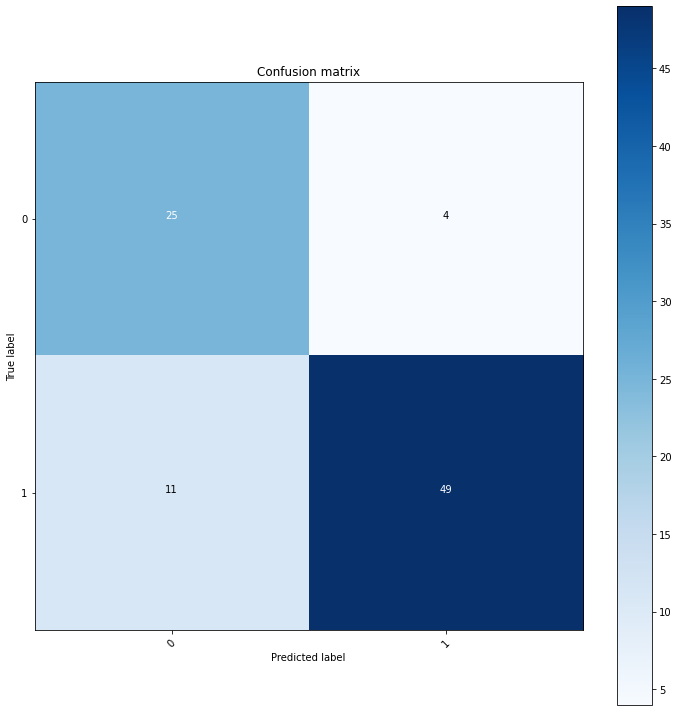

In [22]:
plot_confusion_matrix(get_metrics(train_result_strat1, 5)["CM"], classes = [0, 1]);

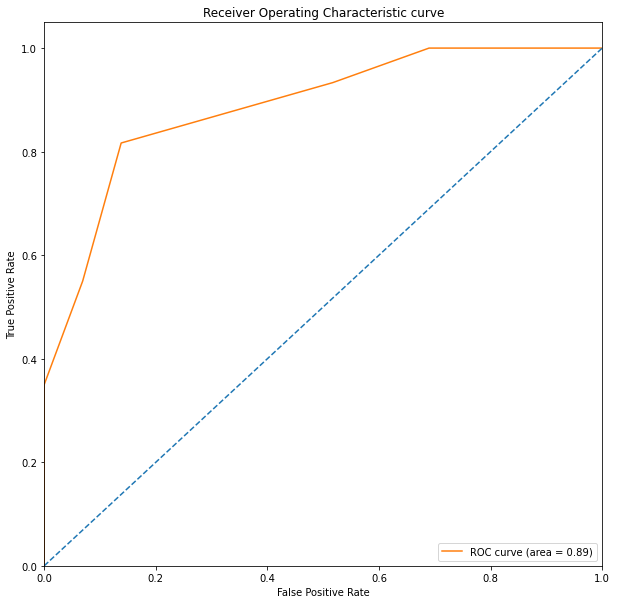

In [23]:
roc = get_metrics(train_result_strat1, 5)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"]);

*validation data:*

In [24]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, -1, pretty_print = True)
)

Strategy 1:  {'ACC': 0.2608695652173913, 'FPR': 0.5714285714285714, 'AUC': 0.41517857142857145, 'Ya': 0.42857142857142855, 'EF': 0.6160714285714286, 'REF': 42.857142857142854} 
Strategy 2:  {'ACC': 0.2608695652173913, 'FPR': 0.5714285714285714, 'AUC': 0.4241071428571429, 'Ya': 0.42857142857142855, 'EF': 0.6160714285714286, 'REF': 42.857142857142854} 
Strategy 3:  {'ACC': 0.43478260869565216, 'FPR': 0.5714285714285714, 'AUC': 0.44196428571428575, 'Ya': 0.6363636363636364, 'EF': 0.9147727272727273, 'REF': 63.63636363636363} 
Strategy 4:  {'ACC': 0.4782608695652174, 'FPR': 0.5714285714285714, 'AUC': 0.44642857142857145, 'Ya': 0.6666666666666666, 'EF': 0.9583333333333333, 'REF': 66.66666666666667}


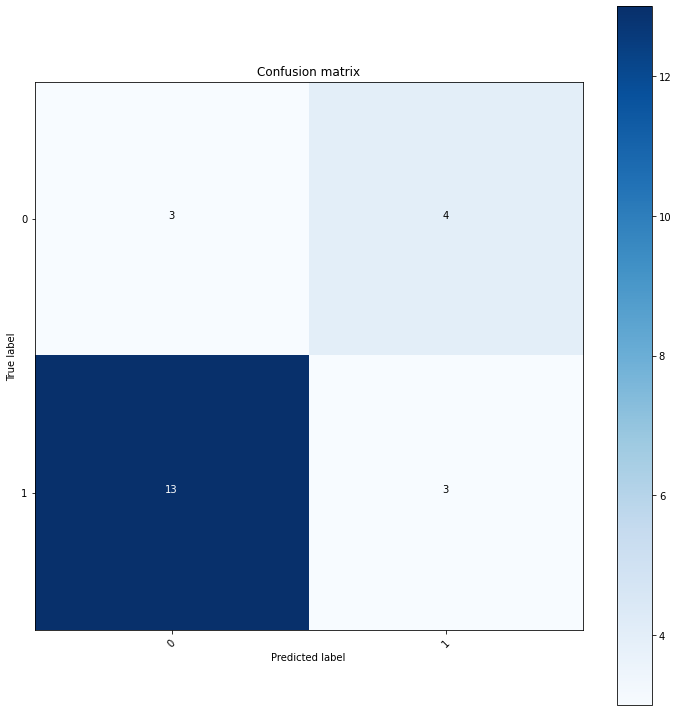

In [25]:
plot_confusion_matrix(get_metrics(val_result_strat1, 5)["CM"], classes = [0, 1]);

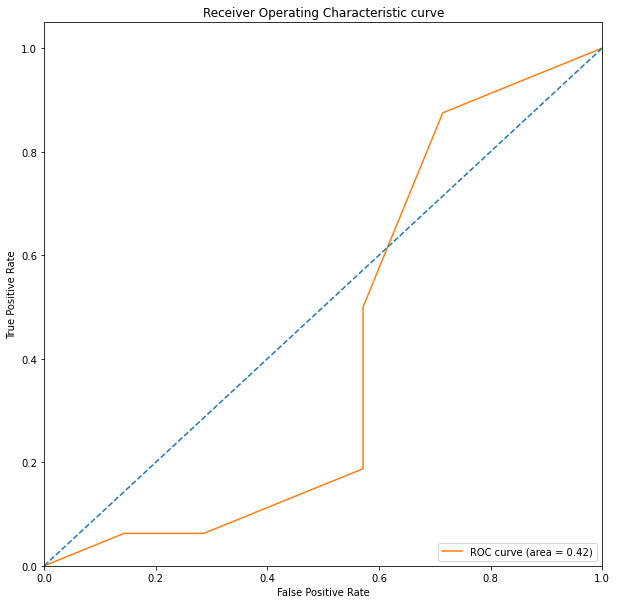

In [26]:
roc = get_metrics(val_result_strat1, 5)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"]);

*test data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, -1, pretty_print = True)
)

Strategy 1:  {'ACC': 0.5172413793103449, 'FPR': 0.45454545454545453, 'AUC': 0.43686868686868685, 'Ya': 0.6428571428571429, 'EF': 1.0357142857142858, 'REF': 64.28571428571429} 
Strategy 2:  {'ACC': 0.4827586206896552, 'FPR': 0.5454545454545454, 'AUC': 0.4444444444444444, 'Ya': 0.6, 'EF': 0.9666666666666666, 'REF': 60.0} 
Strategy 3:  {'ACC': 0.4827586206896552, 'FPR': 0.7272727272727273, 'AUC': 0.4090909090909091, 'Ya': 0.5789473684210527, 'EF': 0.9327485380116959, 'REF': 61.111111111111114} 
Strategy 4:  {'ACC': 0.5172413793103449, 'FPR': 0.7272727272727273, 'AUC': 0.4015151515151515, 'Ya': 0.6, 'EF': 0.9666666666666666, 'REF': 66.66666666666667}


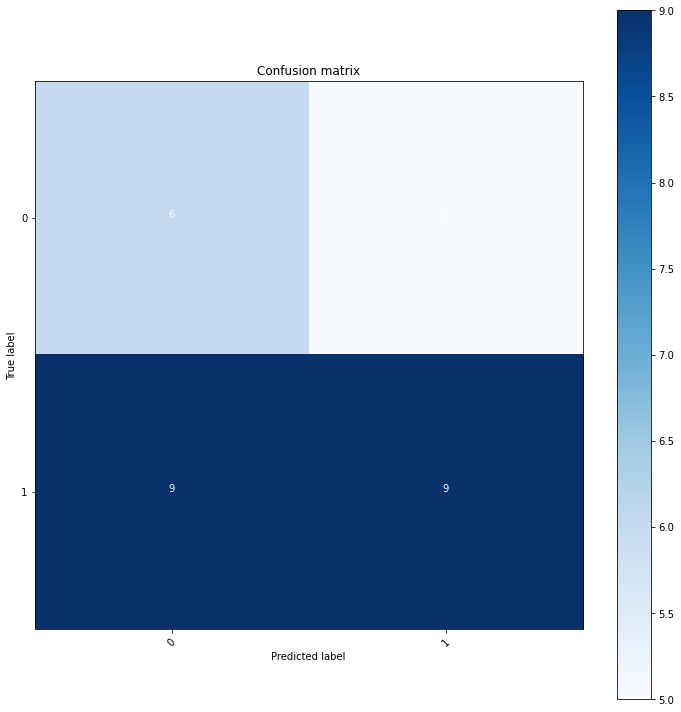

In [28]:
plot_confusion_matrix(get_metrics(test_result_strat1, 5)["CM"], classes = [0, 1]);

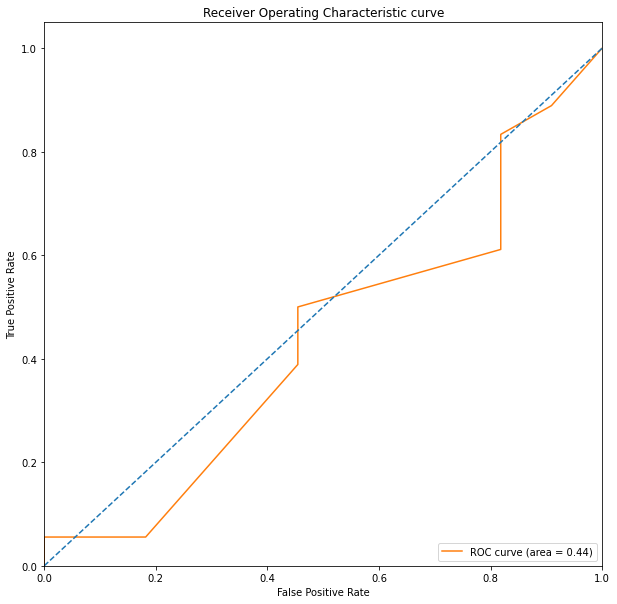

In [29]:
roc = get_metrics(test_result_strat1, 5)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"]);

#### **Clean up:**

In [30]:
os.remove("scoring.py")